In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df_cms = pd.read_csv("/content/drive/MyDrive/Project_CDAC/Prepared_Data/pop_data/part-00000-e01d7855-47f5-4857-a424-3690667f75a5-c000.csv")

In [ ]:
df_cms.head()

,Rndrng_Prvdr_Type,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_Gndr,Tot_HCPCS_Cds,Bene_Avg_Age,Tot_Srvcs,Tot_Benes,Bene_Avg_Risk_Scre,Tot_Sbmtd_Chrg,Tot_Mdcr_Pymt_Amt,Fraud
0,Obstetrics & Gynecology,IL,F,23,70,100.0,39,0.8967,28210.0,8213.45,0
1,Physician Assistant,NC,M,28,69,130.0,52,1.2057,20608.0,5159.34,0
2,Nurse Practitioner,OH,F,12,72,302.0,231,1.4862,66110.0,21759.75,0
3,"Psychologist, Clinical",VA,M,7,68,435.0,37,1.4969,130636.0,17504.99,0
4,Infectious Disease,IA,F,24,70,785.0,219,2.9945,143509.0,45935.78,0


In [ ]:
df_cms.shape

(4754509, 11)

In [ ]:
df_cms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754509 entries, 0 to 4754508
Data columns (total 11 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Rndrng_Prvdr_Type          object 
 1   Rndrng_Prvdr_State_Abrvtn  object 
 2   Rndrng_Prvdr_Gndr          object 
 3   Tot_HCPCS_Cds              int64  
 4   Bene_Avg_Age               int64  
 5   Tot_Srvcs                  float64
 6   Tot_Benes                  int64  
 7   Bene_Avg_Risk_Scre         float64
 8   Tot_Sbmtd_Chrg             float64
 9   Tot_Mdcr_Pymt_Amt          float64
 10  Fraud                      int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 399.0+ MB


<ipython-input-7-8e975aa5fdca>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Non_Fraud', 'Fraud'], fontsize=22)


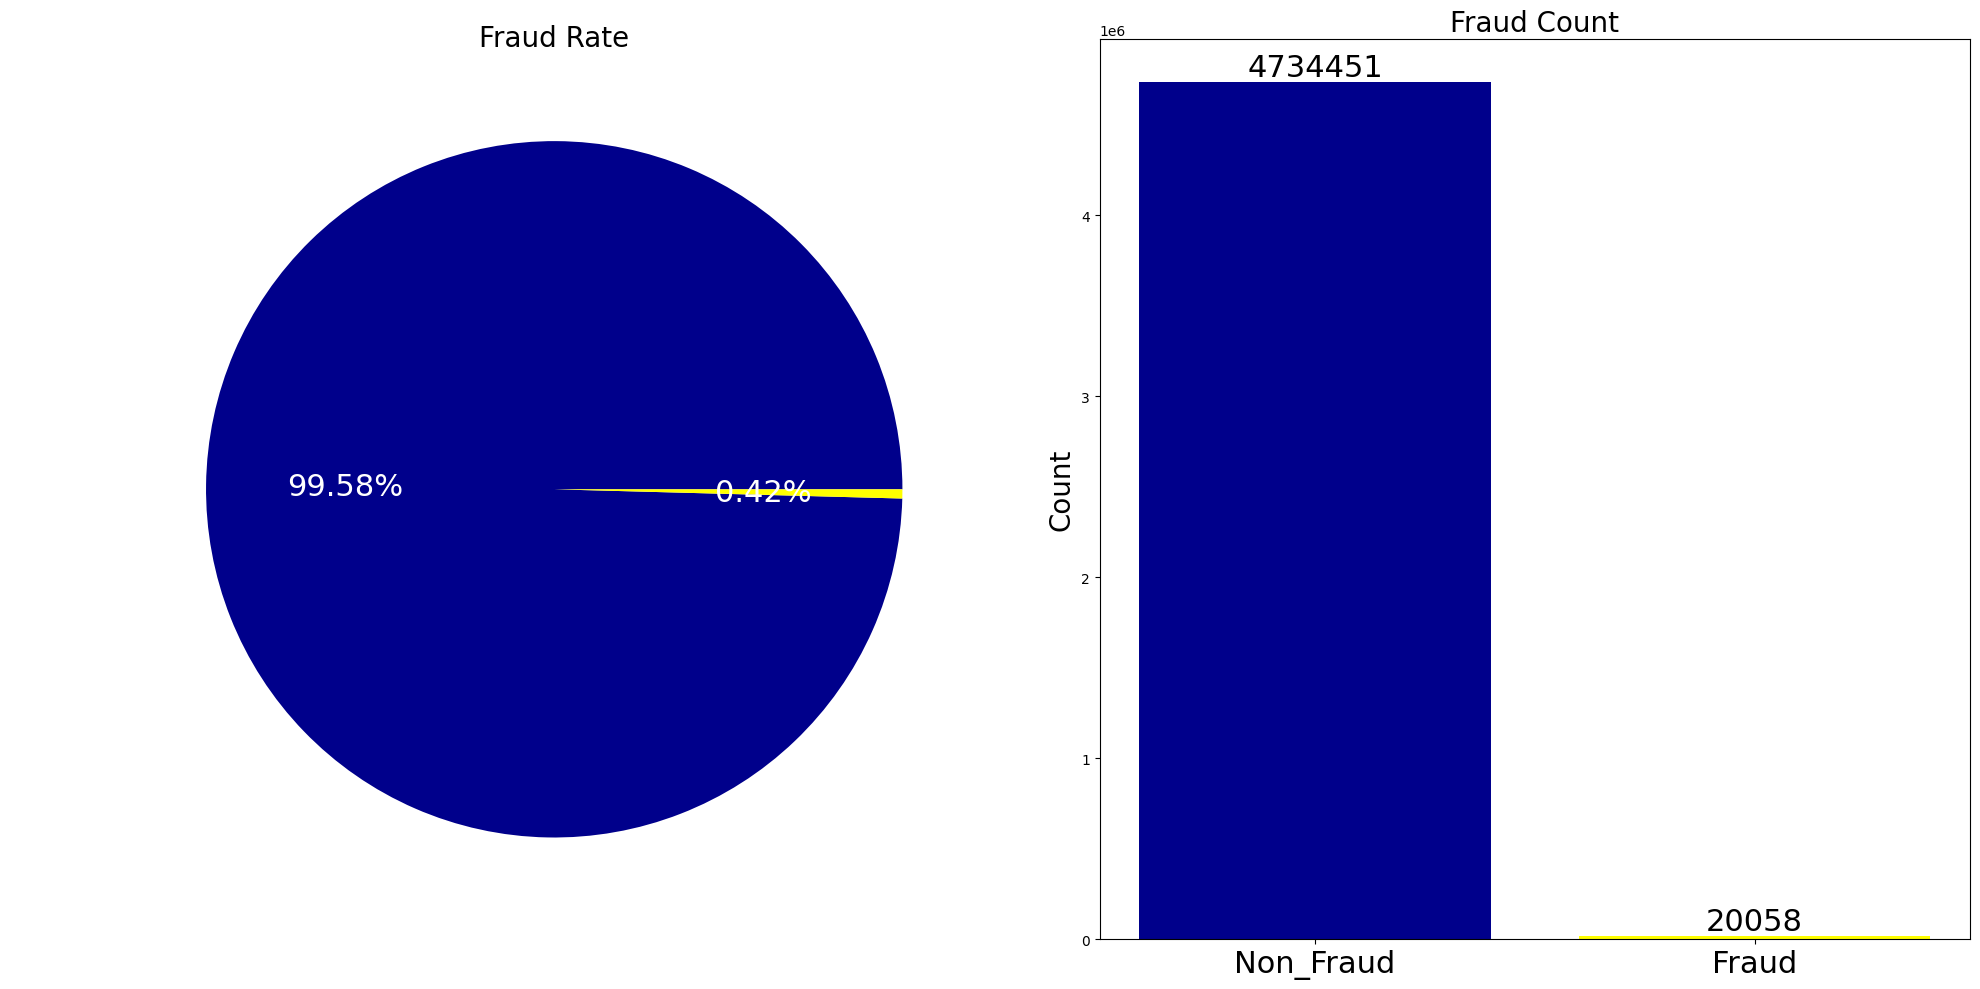

In [ ]:
plt.rcParams["figure.figsize"] = (20, 10)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2)
fraud_counts = df_cms['Fraud'].value_counts()
colors = ['darkblue', 'yellow']

# Pie chart
axes[0].pie(fraud_counts, labels=['Non_Fraud', 'Fraud'], autopct='%.2f%%', textprops={'fontsize': 22,'color':'white'},colors = colors)
axes[0].set_title('Fraud Rate', fontsize=20)

# Bar chart
bars = axes[1].bar(['Non_Fraud', 'Fraud'], fraud_counts, color= colors)
axes[1].set_title('Fraud Count',fontsize=20)
axes[1].set_ylabel('Count',fontsize=20)
for bar in bars:
    height = bar.get_height()
    axes[1].annotate(f'{height}',  # The text to display
                     xy=(bar.get_x() + bar.get_width() / 2, height),  # Positioning the text
                     ha='center', va='bottom', fontsize=22)

axes[1].set_xticklabels(['Non_Fraud', 'Fraud'], fontsize=22)
# Show the plot
plt.tight_layout()
plt.show()

### **The current fraud rate of 0.42% does not accurately represent the global average of 10%. To address this discrepancy, it is essential to sample from the negative class (non-fraud cases) in order to raise the fraud rate to the target level of 10%.**

In [ ]:
df_final = pd.read_csv("/content/drive/MyDrive/Project_CDAC/Prepared_Data/sample_data/part-00000-ecc10de4-8ce2-49e5-880e-2f1f6c5f19d2-c000.csv")

In [ ]:
df_final.shape

(199898, 11)

In [ ]:
df_final.head()

,Rndrng_Prvdr_Type,Rndrng_Prvdr_State_Abrvtn,Provider_Gender_Or_Organization,Tot_HCPCS_Cds,Bene_Avg_Age,Tot_Srvcs,Tot_Benes,Bene_Avg_Risk_Scre,Tot_Sbmtd_Chrg,Tot_Mdcr_Pymt_Amt,Fraud
0,Obstetrics & Gynecology,NY,F,16,67,92.0,44,0.8716,12362.00,4747.27,0
1,Certified Registered Nurse Anesthetist (CRNA),WV,F,43,73,173.0,151,1.1677,445627.17,17561.22,0
2,Cardiology,OH,M,42,75,3666.0,1959,1.7947,325148.00,155174.46,0
3,Psychiatry,GA,M,5,51,269.0,86,1.2614,15004.64,10210.46,0
4,Emergency Medicine,NY,M,14,70,592.0,386,3.3561,661135.00,55719.72,0


<ipython-input-11-52ea06f0d1fa>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Non_Fraud', 'Fraud'], fontsize=22)


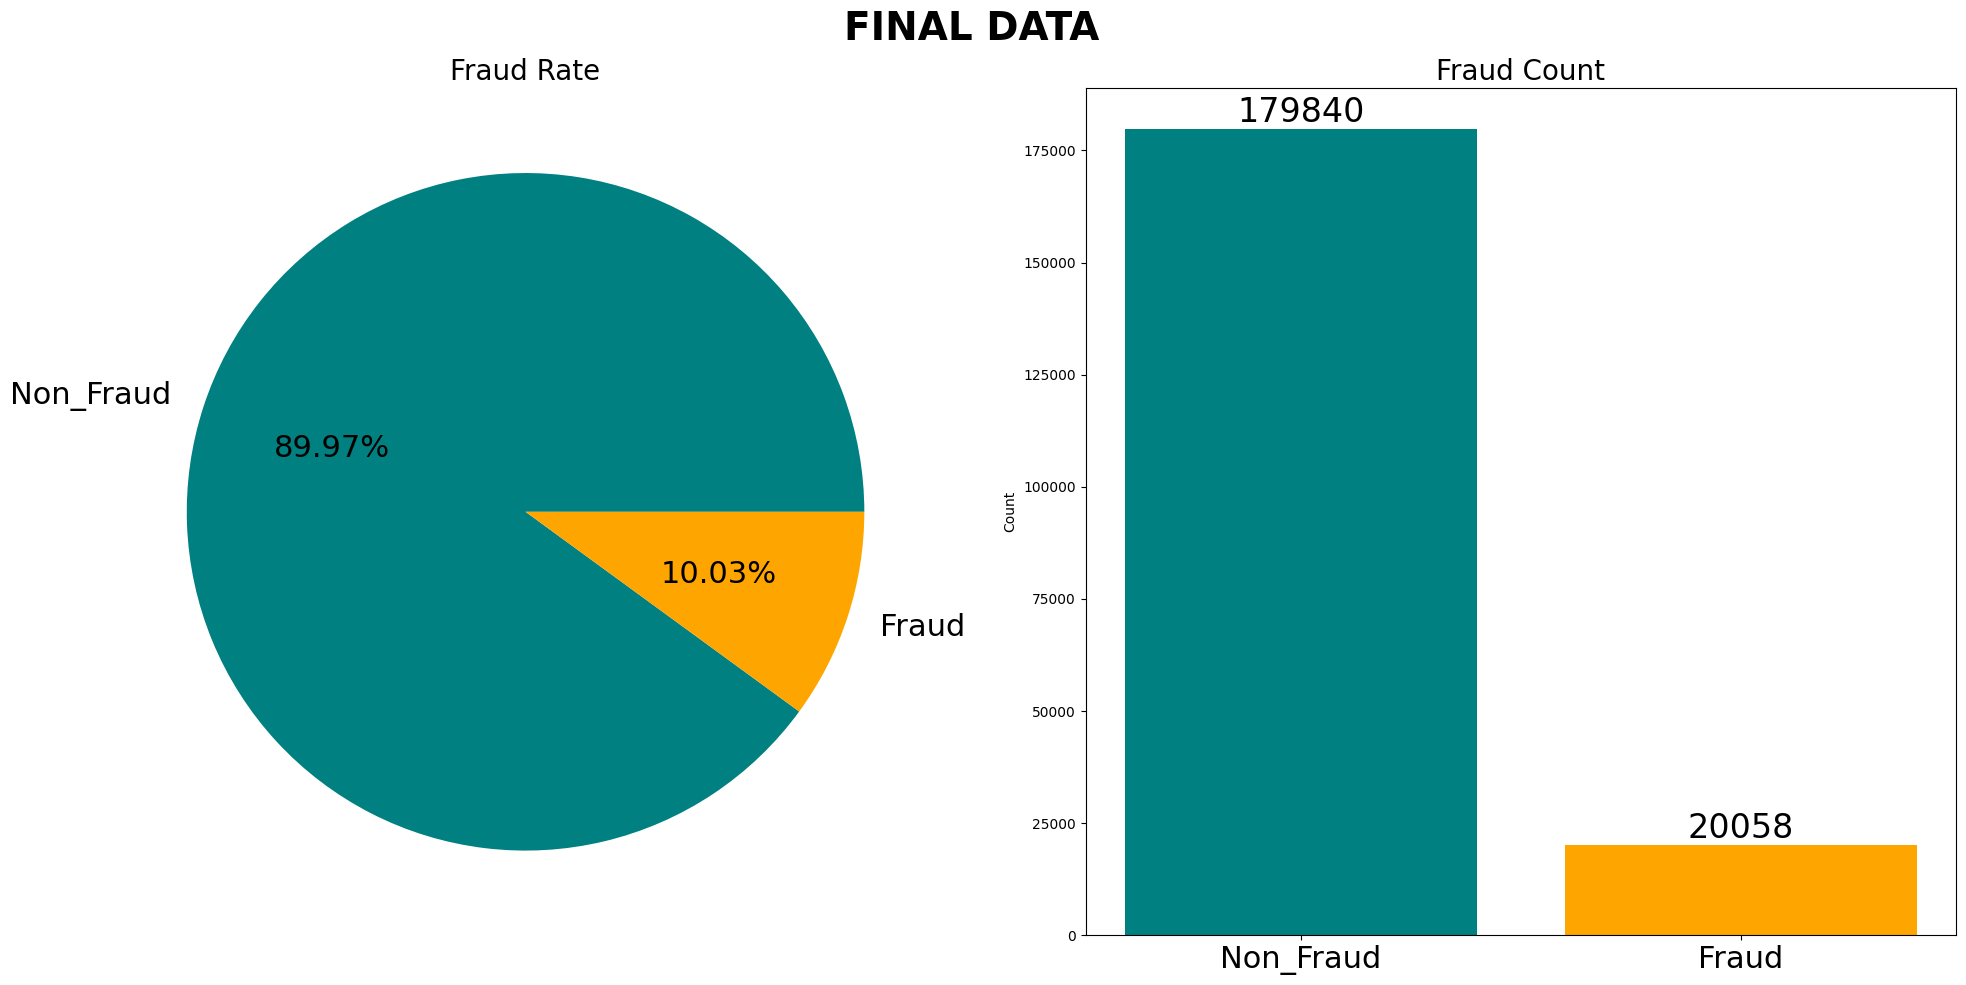

In [ ]:
plt.rcParams["figure.figsize"] = (20, 10)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2)
fraud_counts = df_final['Fraud'].value_counts()
colors = ['teal', 'orange']

# Pie chart
axes[0].pie(fraud_counts, labels=['Non_Fraud', 'Fraud'], autopct='%.2f%%', textprops={'fontsize': 22,'color':'black'},colors = colors)
axes[0].set_title('Fraud Rate', fontsize=20)

# Bar chart
bars = axes[1].bar(['Non_Fraud', 'Fraud'], fraud_counts, color= colors)
axes[1].set_title('Fraud Count',fontsize=20)
axes[1].set_ylabel('Count')
for bar in bars:
    height = bar.get_height()
    axes[1].annotate(f'{height}',  # The text to display
                     xy=(bar.get_x() + bar.get_width() / 2, height),  # Positioning the text
                     ha='center', va='bottom', fontsize=24)
axes[1].set_xticklabels(['Non_Fraud', 'Fraud'], fontsize=22)
# Show the plot
plt.suptitle('FINAL DATA', fontsize=28, fontweight='bold', fontfamily='sans-serif', ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Display the top 10 most common provider types as percentages for both population and sample
print('Top 10 Most Common Provider Types (Population):')
display(df_cms['Rndrng_Prvdr_Type'].value_counts(normalize=True).head(10) * 100)

print('Top 10 Most Common Provider Types (Sample):')
display(df_final['Rndrng_Prvdr_Type'].value_counts(normalize=True).head(10) * 100)

Top 10 Most Common Provider Types (Population):


,proportion
Rndrng_Prvdr_Type,
Nurse Practitioner,13.252935
Internal Medicine,7.721786
Physician Assistant,7.601100
Family Practice,7.064830
Physical Therapist in Private Practice,5.342907
Certified Registered Nurse Anesthetist (CRNA),4.039092
Emergency Medicine,3.901202
Anesthesiology,3.309616
Chiropractic,2.868120


Top 10 Most Common Provider Types (Sample):


,proportion
Rndrng_Prvdr_Type,
Nurse Practitioner,13.304785
Internal Medicine,7.694924
Physician Assistant,7.540346
Family Practice,7.265205
Physical Therapist in Private Practice,5.193149
Certified Registered Nurse Anesthetist (CRNA),4.056569
Emergency Medicine,3.923501
Anesthesiology,3.292679
Chiropractic,2.944502


In [ ]:
import numpy as np
num_feat = df_final.select_dtypes(include=np.number)
num_feat.describe()

,Tot_HCPCS_Cds,Bene_Avg_Age,Tot_Srvcs,Tot_Benes,Bene_Avg_Risk_Scre,Tot_Sbmtd_Chrg,Tot_Mdcr_Pymt_Amt,Fraud
count,199898.000000,199898.000000,1.998980e+05,199898.000000,199898.000000,1.998980e+05,1.998980e+05,199898.000000
mean,28.798617,71.584273,2.943633e+03,332.488519,1.607842,3.616559e+05,9.036515e+04,0.100341
std,31.280768,5.548415,7.831533e+04,3652.910514,0.809820,3.879398e+06,6.895823e+05,0.300455
min,1.000000,10.000000,1.100000e+01,11.000000,0.335200,8.250000e+01,0.000000e+00,0.000000
25%,9.000000,70.000000,1.710000e+02,59.000000,1.047400,3.401868e+04,1.039179e+04,0.000000
50%,18.000000,72.000000,4.800000e+02,152.000000,1.377950,1.087567e+05,2.891177e+04,0.000000
75%,38.000000,74.000000,1.389000e+03,331.000000,1.969300,2.986048e+05,7.402556e+04,0.000000
max,798.000000,94.000000,2.061045e+07,927087.000000,12.622600,8.219776e+08,1.397601e+08,1.000000


In [ ]:

def detect_outliers(df):
    outlier_counts = {}
    total_outliers = 0
    for col in df_final.select_dtypes(include=np.number).columns:
        Q1 = np.quantile(df[col], 0.25)
        Q3 = np.quantile(df[col], 0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = outliers.shape[0]
        total_outliers += outliers.shape[0]
    return outlier_counts,total_outliers



In [ ]:
outliers_count,total_outliers = detect_outliers(df_final)


for column, count in outliers_count.items():
    print(f'Outliers in {column}: {count}')

print()
print("The total number of outliers are: ",total_outliers)

Outliers in Tot_HCPCS_Cds: 11818
Outliers in Bene_Avg_Age: 17453
Outliers in Tot_Srvcs: 22558
Outliers in Tot_Benes: 16197
Outliers in Bene_Avg_Risk_Scre: 6430
Outliers in Tot_Sbmtd_Chrg: 19549
Outliers in Tot_Mdcr_Pymt_Amt: 19412
Outliers in Fraud: 20058

The total number of outliers are:  133475


In [ ]:
df_outl = pd.DataFrame.from_dict(outliers_count, orient='index', columns=['Outliers'])
df_outl['Percentage'] = df_outl['Outliers'] / df_final.shape[0] * 100
df_outl_sorted = df_outl.sort_values(by=['Percentage'], ascending=False)

df_outl_sorted

,Outliers,Percentage
Tot_Srvcs,22558,11.284755
Fraud,20058,10.034117
Tot_Sbmtd_Chrg,19549,9.779488
Tot_Mdcr_Pymt_Amt,19412,9.710953
Bene_Avg_Age,17453,8.730953
Tot_Benes,16197,8.102632
Tot_HCPCS_Cds,11818,5.912015
Bene_Avg_Risk_Scre,6430,3.216640


Text(0.5, 1.0, 'Gender')

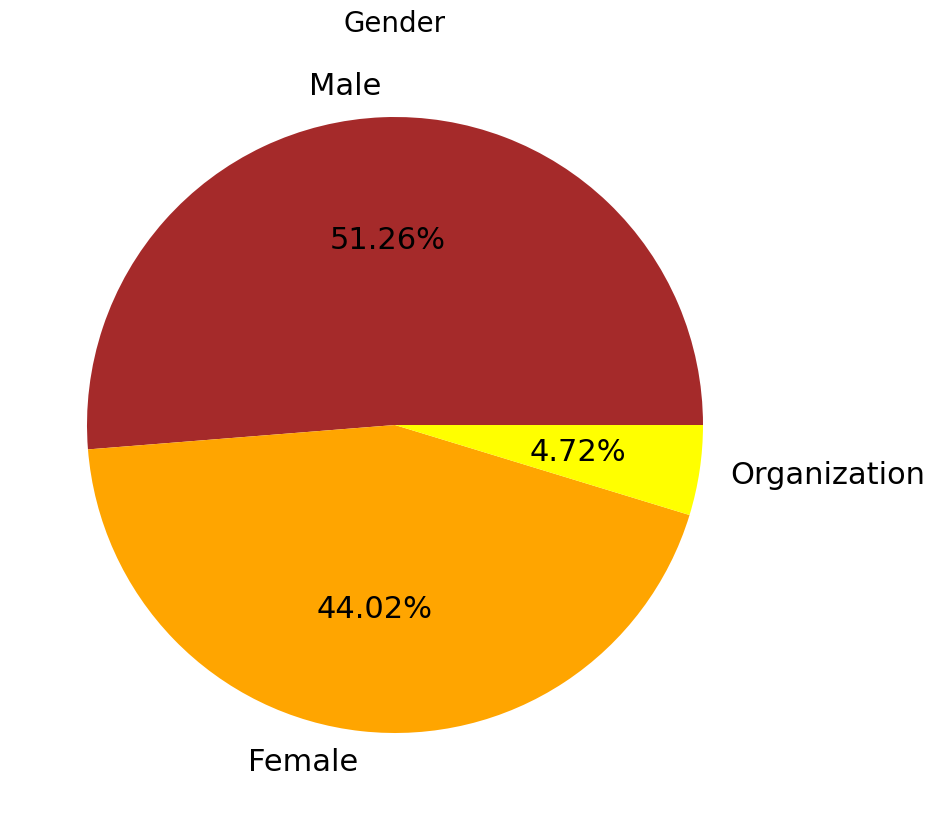

In [ ]:
plt.rcParams["figure.figsize"] = (10, 10)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=1)
fraud_counts = df_final['Provider_Gender_Or_Organization'].value_counts()
colors = ['brown', 'orange','yellow']

# Pie chart
axes.pie(fraud_counts, labels=['Male',"Female","Organization"], autopct='%.2f%%', textprops={'fontsize': 22,'color':'black'},colors = colors)
axes.set_title('Gender', fontsize=20)

In [ ]:
frauds_counts = df_final.groupby('Provider_Gender_Or_Organization')['Fraud'].sum().reset_index()
frauds_counts.columns = ['Provider_Gender_Or_Organization', 'Fraud_Count']
frauds_counts

,Provider_Gender_Or_Organization,Fraud_Count
0,F,6749
1,M,13276
2,Organization,33


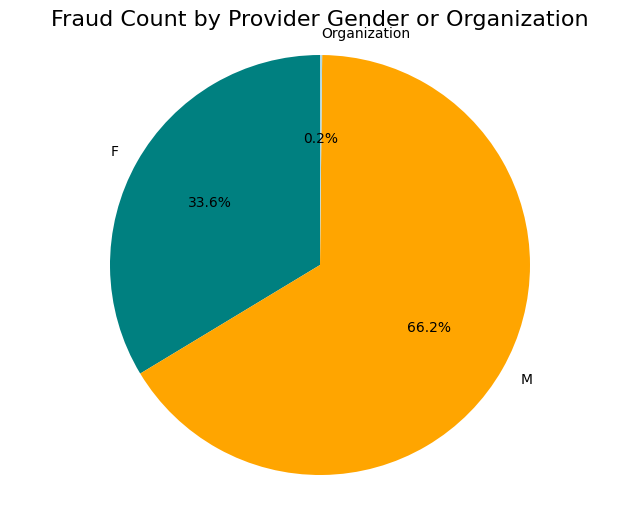

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(frauds_counts['Fraud_Count'], labels=frauds_counts['Provider_Gender_Or_Organization'], autopct='%.1f%%', startangle=90, colors=['teal', 'orange', 'lightblue'])
plt.title('Fraud Count by Provider Gender or Organization', fontsize=16)
print()
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()